In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut

In [2]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier

from sklearn.metrics import matthews_corrcoef, make_scorer

In [3]:
min_value = 0
med_value = 0
max_value = 0

In [155]:
descriptors = pd.read_csv('scores.csv')

def get_relevant_rows(source, counter): 
    relevant_number = source + '_' + str(counter)
    return int(descriptors.loc[descriptors["number"] == relevant_number].days)h

def load_and_sum(source, counter, threshold = 4, binarize = True):
    global max_value
    global med_value
    # read csv with activity data
    df = pd.read_csv(source + '_' + str(counter) + '.csv')
    
    # ensure timestamp column is a timestamp
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    
    # Binarize based on threshold
    if(binarize == True):
        df['activity'] = df['activity'].mask(df['activity'] > threshold, 1).mask(df['activity'] <= threshold, 0)
    
    # make that column as our index
    df.index = df['timestamp'] 
    
    
    
    # group activities in hour window
    df2 = df.resample('H').sum()

    ## commented display
    # df2

    # split timestamp in 2 columns, date and time as we want to pivot the time (hourly windows) in columns
    df2['date'] = pd.to_datetime(df2.index).date
    df2['time'] = pd.to_datetime(df2.index).time
    
    #set global maximum value
    max_value = max(max_value, df2.activity.max())
    if(med_value == 0):
        med_value = df2.activity.mean()
    else:
        med_value = (med_value + df2.activity.mean()) / 2
    
    return df2

def load_and_pivot_as_classes(source, counter):
    df = load_and_sum(source, counter)
    df['H'] = np.where(df['activity']>=30, 1, 0)
    df['M'] = np.where((df['activity']>=10) & (df['activity']<30), 1, 0)
    df['L'] = np.where((df['activity']>=0) & (df['activity']<10), 1, 0)
    df = df.drop(columns=['activity'])
    return df.pivot(index='date', columns='time', values=['H', 'M','L']).fillna(0)

def load_and_pivot(source, counter):
    # tadaaa
    return load_and_sum(source, counter).pivot(index='date', columns='time', values='activity').fillna(0)

def plot_array_in_axis(data_array, axn):
    arr_idx = 0
    
    for ax in axn.flat:
        if(arr_idx >= len(data_array)):
            break

        #sns.heatmap(data_array[arr_idx], ax=ax, vmin = min_value, vmax = max_value, center = med_value, xticklabels=False, yticklabels=False)
        sns.heatmap(data_array[arr_idx], ax=ax, center = med_value, xticklabels=False, yticklabels=False)
        arr_idx += 1
        
        
def get_pca(matrix_to_extract, number_of_behaviors=3):
    pca = PCA(n_components=number_of_behaviors)
    principalComponents = pca.fit_transform(matrix_to_extract)
    return pca

def get_eigenbehavios(matrix_to_extract, number_of_behaviors=2):
    return get_pca(matrix_to_extract, number_of_behaviors).components_

def process_as_mean_diff(dataframe):
    mean_behavior = dataframe.mean(axis=0)
    return dataframe.sub(mean_behavior, axis=1)

In [82]:
## Sample single control
#df3 = load_and_pivot('control', 1)
#sns.heatmap(df3, xticklabels=False, yticklabels=False)


H                                                        \
time       00:00:00 01:00:00 02:00:00 03:00:00 04:00:00 05:00:00 06:00:00   
date                                                                        
2003-06-03   -0.625   -0.375  -0.3125  -0.3125  -0.1875   -0.125   -0.125   
2003-06-04   -0.625   -0.375  -0.3125  -0.3125  -0.1875   -0.125   -0.125   
2003-06-05    0.375    0.625   0.6875   0.6875  -0.1875   -0.125   -0.125   
2003-06-06    0.375    0.625  -0.3125  -0.3125  -0.1875   -0.125   -0.125   
2003-06-07    0.375    0.625   0.6875  -0.3125   0.8125   -0.125   -0.125   
2003-06-08   -0.625    0.625   0.6875   0.6875  -0.1875   -0.125   -0.125   
2003-06-09    0.375   -0.375  -0.3125   0.6875  -0.1875    0.875    0.875   
2003-06-10    0.375   -0.375  -0.3125  -0.3125  -0.1875   -0.125   -0.125   
2003-06-11   -0.625   -0.375  -0.3125  -0.3125  -0.1875   -0.125   -0.125   
2003-06-12    0.375   -0.375  -0.3125  -0.3125  -0.1875   -0.125   -0.125   
2003-06-13    0.375   -0.375  -0.3125  -0.3125  -0.1875   -0.125   -0.125   
2003-06-14    0.375    0.625  -0.3125   0.6875   0.8125    0.875    0.875   
2003-06-15    0.375    0.625   0.6875   0.6875   0.8125   -0.125   -0.125   
2003-06-16    0.375   -0.375   0.6875  -0.3125  -0.1875   -0.125   -0.125   
2003-06-17   -0.625   -0.375  -0.3125  -0.3125  -0.1875   -0.125   -0.125   
2003-06-18   -0.625   -0.375  -0.3125  -0.3125  -0.1875   -0.125   -0.125   

                                        ...           L                    \
time       07:00:00 08:00:00 09:00:00   ...    14:00:00 15:00:00 16:00:00   
date                                    ...                                 
2003-06-03  -0.1875  -0.4375   -0.375   ...         0.0      0.0   -0.125   
2003-06-04   0.8125   0.5625    0.625   ...         0.0      0.0   -0.125   
2003-06-05  -0.1875  -0.4375   -0.375   ...         0.0      0.0   -0.125   
2003-06-06  -0.1875  -0.4375   -0.375   ...         0.0      0.0   -0.125   
2003-06-07  -0.1875  -0.4375   -0.375   ...         0.0      0.0   -0.125   
2003-06-08  -0.1875  -0.4375   -0.375   ...         0.0      0.0   -0.125   
2003-06-09  -0.1875  -0.4375   -0.375   ...         0.0      0.0   -0.125   
2003-06-10   0.8125   0.5625    0.625   ...         0.0      0.0   -0.125   
2003-06-11  -0.1875   0.5625    0.625   ...         0.0      0.0   -0.125   
2003-06-12  -0.1875   0.5625    0.625   ...         0.0      0.0   -0.125   
2003-06-13  -0.1875   0.5625    0.625   ...         0.0      0.0   -0.125   
2003-06-14   0.8125   0.5625   -0.375   ...         0.0      0.0   -0.125   
2003-06-15  -0.1875  -0.4375   -0.375   ...         0.0      0.0    0.875   
2003-06-16  -0.1875   0.5625    0.625   ...         0.0      0.0   -0.125   
2003-06-17  -0.1875  -0.4375   -0.375   ...         0.0      0.0    0.875   
2003-06-18  -0.1875  -0.4375   -0.375   ...         0.0      0.0   -0.125   

                                                                           
time       17:00:00 18:00:00 19:00:00 20:00:00 21:00:00 22:00:00 23:00:00  
date                                                                       
2003-06-03   -0.125   -0.125  -0.0625  -0.0625  -0.0625  -0.0625  -0.0625  
2003-06-04   -0.125   -0.125  -0.0625  -0.0625  -0.0625  -0.0625  -0.0625  
2003-06-05   -0.125   -0.125  -0.0625  -0.0625  -0.0625  -0.0625  -0.0625  
2003-06-06   -0.125   -0.125  -0.0625  -0.0625  -0.0625  -0.0625  -0.0625  
2003-06-07   -0.125   -0.125  -0.0625  -0.0625  -0.0625  -0.0625  -0.0625  
2003-06-08   -0.125   -0.125  -0.0625  -0.0625  -0.0625  -0.0625  -0.0625  
2003-06-09   -0.125   -0.125  -0.0625  -0.0625  -0.0625  -0.0625  -0.0625  
2003-06-10   -0.125   -0.125  -0.0625  -0.0625  -0.0625  -0.0625  -0.0625  
2003-06-11   -0.125   -0.125  -0.0625  -0.0625  -0.0625  -0.0625  -0.0625  
2003-06-12   -0.125   -0.125  -0.0625  -0.0625  -0.0625  -0.0625  -0.0625  
2003-06-13   -0.125   -0.125  -0.0625  -0.0625  -0.0625  -0.0625  -0.0625  
2003-06-14    0.875   -0.1

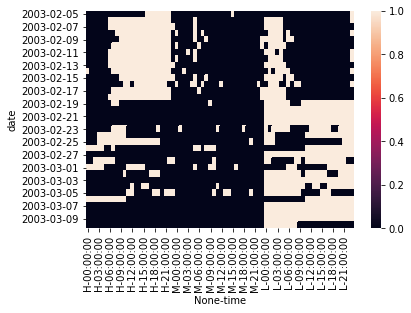

In [156]:
cond4_leveled = load_and_pivot_as_classes('control', 5)
sns.heatmap(cond4_leveled)


[0.50294989 0.19024391 0.0949643 ]


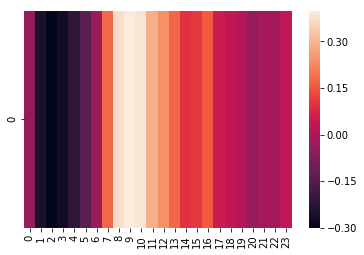

In [16]:


#first_eigenbehavior = pd.DataFrame(pca.components_[0]).transpose()
#sns.heatmap(first_eigenbehavior)
#pca.explained_variance_ratio_
## calculate average of behavior
data_to_calculate = load_and_pivot('condition', 4).head(get_relevant_rows('condition', 4))
mean_behavior = data_to_calculate.mean(axis=0)

## each day = difference from average
root_for_pca = data_to_calculate.sub(mean_behavior, axis=1)

## pca on top of difference
pca = get_pca(root_for_pca.values)
first_eigenbehavior = pd.DataFrame(pca.components_[0]).transpose()
print(pca.explained_variance_ratio_)
##plot pca
sns.heatmap(pd.DataFrame(pca.components_[0]).transpose())

In [7]:
#individual difference from group mean
indiv_1 = load_and_pivot('control', 8).head(12)
indiv_1_to_grp_mean = (indiv_1.sub(all_control_dfs.mean(axis =0), axis=1))

# this is the individual distance to the group
w_1 = indiv_1_to_grp_mean.mul(all_control_behaviors.components_[0])

indiv_2 = load_and_pivot('control', 3).head(12)
indiv_2_to_grp_mean = (indiv_2.sub(all_control_dfs.mean(axis =0), axis=1))

# this is the individual distance to the group
w_2 = indiv_2_to_grp_mean.mul(all_control_behaviors.components_[0])

#indiv distance:

sum(np.linalg.norm(w_1[:24].values - w_2[:24].values,
                   axis=1))




NameError: name 'all_control_dfs' is not defined

In [161]:
#Class-based:
control_dfs = pd.DataFrame()
control_first_eigenbehavior = pd.DataFrame()
control_activity = pd.DataFrame()
all_control_dfs = pd.DataFrame()
for item in range(1, 33, 1):
    control_df = load_and_pivot_as_classes('control', item)
    control_df = control_df.head(get_relevant_rows('control', item))
    
    all_control_dfs = all_control_dfs.append(control_df.copy())
    
    control_df = process_as_mean_diff(control_df)
    control_df['number'] = 'control_' + str(item)
    control_df['label'] = 'control'
    control_dfs = control_dfs.append(control_df)
    
all_control_data_for_pca = process_as_mean_diff(all_control_dfs)

       
condition_dfs = pd.DataFrame()
condition_first_eigenbehavior = pd.DataFrame()
condition_activity = pd.DataFrame()
all_condition_dfs = pd.DataFrame()
for item in range(1, 24, 1):
    condition_df = load_and_pivot_as_classes('condition', item)
    condition_df = condition_df.head(get_relevant_rows('condition', item))
    
    all_condition_dfs = all_condition_dfs.append(condition_df.copy())
    
    condition_df = process_as_mean_diff(condition_df)
    condition_df['number'] = 'condition_' + str(item)
    condition_df['label'] = 'condition'
    condition_dfs = condition_dfs.append(condition_df)

all_condition_data_for_pca = process_as_mean_diff(all_condition_dfs)
#all_condition_data_for_pca = all_condition_dfs

    
# merge both dataframes
all_dfs = pd.concat([control_dfs, condition_dfs])
cols_to_norm = all_dfs.columns[:72].values # 3 classes times 24 hours
    
## normalize a single column across all dataframes?
## or normalize data across all timestemps for all dataframes? (looks better... but not 'individual')

#from sklearn.preprocessing import StandardScaler
#cols_to_norm = all_dfs.columns[:24].values
#all_dfs[cols_to_norm] = StandardScaler().fit_transform(all_dfs[cols_to_norm])

#from sklearn.preprocessing import MinMaxScaler
#cols_to_norm = all_dfs.columns[:24].values
#all_dfs[cols_to_norm] = MinMaxScaler().fit_transform(all_dfs[cols_to_norm])

all_control_behaviors = get_pca(all_control_data_for_pca[:72].values)
all_condition_behaviors = get_pca(all_condition_data_for_pca[:72].values)


# evaluate normalized controls
for item in range(1,33,1):
    control_df = all_dfs.loc[all_dfs['number'] == ( 'control_' + str(item) ) ]
    control_df = control_df[cols_to_norm]
    pca = get_pca(control_df.values)
    first_eigenbehavior = pd.DataFrame(pca.components_[0]).transpose()
    all_behaviors = pd.concat(
        [ pd.DataFrame(pca.components_[0]).transpose(),
          pd.DataFrame(pca.components_[1]).transpose(),
          pd.DataFrame(pca.components_[2]).transpose(),
        ], axis = 1) #concatenate side by side
    control_first_eigenbehavior = control_first_eigenbehavior.append(all_behaviors)
    # Sum all the activity for a given control, use to compare to PCA:
    control_activity = control_activity.append(control_df.sum(axis = 0),ignore_index=True)

# evaluate normalized conditions
for item in range(1, 24, 1):
    condition_df = all_dfs.loc[all_dfs['number'] == ( 'condition_' + str(item) ) ]
    condition_df = condition_df[cols_to_norm]
    pca = get_pca(condition_df.values)
    first_eigenbehavior = pd.DataFrame(pca.components_[0]).transpose()
    all_behaviors = pd.concat(
        [ pd.DataFrame(pca.components_[0]).transpose(),
          pd.DataFrame(pca.components_[1]).transpose(),
          pd.DataFrame(pca.components_[2]).transpose(),
        ], axis = 1) #concatenate side by side
    condition_first_eigenbehavior = condition_first_eigenbehavior.append(all_behaviors) 
    # Sum all the activity for a given control, use to compare to PCA
    condition_activity = condition_activity.append(condition_df.sum(axis = 0),ignore_index=True)


control_first_eigenbehavior_df = control_first_eigenbehavior.copy()
control_first_eigenbehavior_df['label'] = 'control'
control_activity['label'] = 'control'

condition_first_eigenbehavior_df = condition_first_eigenbehavior.copy()
condition_first_eigenbehavior_df['label'] = 'condition'
condition_activity['label'] = 'condition'

all_observations = pd.concat([control_first_eigenbehavior_df, condition_first_eigenbehavior_df])
##all_observations.info()
#all_observations = pd.concat([control_activity, condition_activity])

y = all_observations.label
X = all_observations.drop(columns=['label'])

In [158]:
condition_df

H                                                        \
time       00:00:00 01:00:00 02:00:00 03:00:00 04:00:00 05:00:00 06:00:00   
date                                                                        
2002-06-06  -0.4375  -0.0625      0.0      0.0      0.0      0.0      0.0   
2002-06-07  -0.4375  -0.0625      0.0      0.0      0.0      0.0      0.0   
2002-06-08   0.5625   0.9375      0.0      0.0      0.0      0.0      0.0   
2002-06-09  -0.4375  -0.0625      0.0      0.0      0.0      0.0      0.0   
2002-06-10   0.5625  -0.0625      0.0      0.0      0.0      0.0      0.0   
2002-06-11  -0.4375  -0.0625      0.0      0.0      0.0      0.0      0.0   
2002-06-12  -0.4375  -0.0625      0.0      0.0      0.0      0.0      0.0   
2002-06-13  -0.4375  -0.0625      0.0      0.0      0.0      0.0      0.0   
2002-06-14   0.5625  -0.0625      0.0      0.0      0.0      0.0      0.0   
2002-06-15   0.5625  -0.0625      0.0      0.0      0.0      0.0      0.0   
2002-06-16   0.5625  -0.0625      0.0      0.0      0.0      0.0      0.0   
2002-06-17   0.5625  -0.0625      0.0      0.0      0.0      0.0      0.0   
2002-06-18   0.5625  -0.0625      0.0      0.0      0.0      0.0      0.0   
2002-06-19  -0.4375  -0.0625      0.0      0.0      0.0      0.0      0.0   
2002-06-20  -0.4375  -0.0625      0.0      0.0      0.0      0.0      0.0   
2002-06-21  -0.4375  -0.0625      0.0      0.0      0.0      0.0      0.0   

                                        ...           L                    \
time       07:00:00 08:00:00 09:00:00   ...    14:00:00 15:00:00 16:00:00   
date                                    ...                                 
2002-06-06      0.0  -0.1875    -0.25   ...         0.0      0.0  -0.0625   
2002-06-07      0.0  -0.1875    -0.25   ...         0.0      0.0   0.9375   
2002-06-08      0.0  -0.1875    -0.25   ...         0.0      0.0  -0.0625   
2002-06-09      0.0  -0.1875    -0.25   ...         0.0      0.0  -0.0625   
2002-06-10      0.0   0.8125     0.75   ...         0.0      0.0  -0.0625   
2002-06-11      0.0  -0.1875    -0.25   ...         0.0      0.0  -0.0625   
2002-06-12      0.0  -0.1875    -0.25   ...         0.0      0.0  -0.0625   
2002-06-13      0.0   0.8125     0.75   ...         0.0      0.0  -0.0625   
2002-06-14      0.0  -0.1875    -0.25   ...         0.0      0.0  -0.0625   
2002-06-15      0.0  -0.1875    -0.25   ...         0.0      0.0  -0.0625   
2002-06-16      0.0  -0.1875    -0.25   ...         0.0      0.0  -0.0625   
2002-06-17      0.0   0.8125     0.75   ...         0.0      0.0  -0.0625   
2002-06-18      0.0  -0.1875    -0.25   ...         0.0      0.0  -0.0625   
2002-06-19      0.0  -0.1875    -0.25   ...         0.0      0.0  -0.0625   
2002-06-20      0.0  -0.1875     0.75   ...         0.0      0.0  -0.0625   
2002-06-21      0.0  -0.1875    -0.25   ...         0.0      0.0  -0.0625   

                                                                           
time       17:00:00 18:00:00 19:00:00 20:00:00 21:00:00 22:00:00 23:00:00  
date                                                                       
2002-06-06      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
2002-06-07      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
2002-06-08      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
2002-06-09      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
2002-06-10      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
2002-06-11      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
2002-06-12      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
2002-06-13      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
2002-06-14      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
2002-06-15      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
2002-06-16      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
2002-06-17      0.0      0

In [49]:
#Activity-based:
control_dfs = pd.DataFrame()
control_first_eigenbehavior = pd.DataFrame()
control_activity = pd.DataFrame()
all_control_dfs = pd.DataFrame()
for item in range(1, 33, 1):
    control_df = load_and_pivot('control', item)
    control_df = control_df.head(get_relevant_rows('control', item))
    all_control_dfs = all_control_dfs.append(control_df.copy())
    control_df = process_as_mean_diff(control_df)
    control_df['number'] = 'control_' + str(item)
    control_df['label'] = 'control'
    control_dfs = control_dfs.append(control_df)
    
all_control_data_for_pca = process_as_mean_diff(all_control_dfs)

       
condition_dfs = pd.DataFrame()
condition_first_eigenbehavior = pd.DataFrame()
condition_activity = pd.DataFrame()
all_condition_dfs = pd.DataFrame()
for item in range(1, 24, 1):
    condition_df = load_and_pivot('condition', item)
    condition_df = condition_df.head(get_relevant_rows('condition', item))
    all_condition_dfs = all_condition_dfs.append(condition_df.copy())
    #condition_df = process_as_mean_diff(condition_df)
    condition_df['number'] = 'condition_' + str(item)
    condition_df['label'] = 'condition'
    condition_dfs = condition_dfs.append(condition_df)

#all_condition_data_for_pca = process_as_mean_diff(all_condition_dfs)
all_condition_data_for_pca = all_condition_dfs

    
# merge both dataframes
all_dfs = pd.concat([control_dfs, condition_dfs])
cols_to_norm = all_dfs.columns[:24].values
    
## normalize a single column across all dataframes?
## or normalize data across all timestemps for all dataframes? (looks better... but not 'individual')

#from sklearn.preprocessing import StandardScaler
#cols_to_norm = all_dfs.columns[:24].values
#all_dfs[cols_to_norm] = StandardScaler().fit_transform(all_dfs[cols_to_norm])

#from sklearn.preprocessing import MinMaxScaler
#cols_to_norm = all_dfs.columns[:24].values
#all_dfs[cols_to_norm] = MinMaxScaler().fit_transform(all_dfs[cols_to_norm])

all_control_behaviors = get_pca(all_control_data_for_pca[:24].values)
all_condition_behaviors = get_pca(all_condition_data_for_pca[:24].values)


# evaluate normalized controls
for item in range(1,33,1):
    control_df = all_dfs.loc[all_dfs['number'] == ( 'control_' + str(item) ) ]
    control_df = control_df[cols_to_norm]
    pca = get_pca(control_df.values)
    first_eigenbehavior = pd.DataFrame(pca.components_[0]).transpose()
    all_behaviors = pd.concat(
        [ pd.DataFrame(pca.components_[0]).transpose(),
          pd.DataFrame(pca.components_[1]).transpose(),
        ], axis = 1) #concatenate side by side
    control_first_eigenbehavior = control_first_eigenbehavior.append(all_behaviors)
    # Sum all the activity for a given control, use to compare to PCA:
    control_activity = control_activity.append(control_df.sum(axis = 0),ignore_index=True)

# evaluate normalized conditions
for item in range(1, 24, 1):
    condition_df = all_dfs.loc[all_dfs['number'] == ( 'condition_' + str(item) ) ]
    condition_df = condition_df[cols_to_norm]
    pca = get_pca(condition_df.values)
    first_eigenbehavior = pd.DataFrame(pca.components_[0]).transpose()
    all_behaviors = pd.concat(
        [ pd.DataFrame(pca.components_[0]).transpose(),
          pd.DataFrame(pca.components_[1]).transpose(),
        ], axis = 1) #concatenate side by side
    condition_first_eigenbehavior = condition_first_eigenbehavior.append(all_behaviors) 
    # Sum all the activity for a given control, use to compare to PCA
    condition_activity = condition_activity.append(condition_df.sum(axis = 0),ignore_index=True)

"""
    
for control_df in control_dfs:
    pca = get_pca(control_df.values)
    first_eigenbehavior = pd.DataFrame(pca.components_[0]).transpose()
    second_eigenbehavior = pd.DataFrame(pca.components_[0]).transpose()
    all_behaviors = pd.concat([first_eigenbehavior, second_eigenbehavior], axis = 1)
    control_first_eigenbehavior = control_first_eigenbehavior.append(all_behaviors)
    
    
for condition_df in condition_dfs:
    pca = get_pca(condition_df.values)
    first_eigenbehavior = pd.DataFrame(pca.components_[0]).transpose()
    second_eigenbehavior = pd.DataFrame(pca.components_[0]).transpose()
    all_behaviors = pd.concat([first_eigenbehavior, second_eigenbehavior], axis = 1)
    condition_first_eigenbehavior = condition_first_eigenbehavior.append(all_behaviors)
"""

control_first_eigenbehavior_df = control_first_eigenbehavior.copy()
control_first_eigenbehavior_df['label'] = 'control'
control_activity['label'] = 'control'

condition_first_eigenbehavior_df = condition_first_eigenbehavior.copy()
condition_first_eigenbehavior_df['label'] = 'condition'
condition_activity['label'] = 'condition'

all_observations = pd.concat([control_first_eigenbehavior_df, condition_first_eigenbehavior_df])
##all_observations.info()
#all_observations = pd.concat([control_activity, condition_activity])

y = all_observations.label
X = all_observations.drop(columns=['label'])


,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,1.245108e-01,1.245108e-01,1.245108e-01,1.245108e-01,1.245108e-01,1.245108e-01,1.245108e-01,1.019642e-01,3.926465e-02,-1.099324e-01,...,0.000000,0.000000,0.000000,0.095845,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,1.575615e-01,1.393058e-01,9.153265e-02,-1.008459e-16,2.383884e-17,-4.514441e-17,7.110924e-18,-3.022030e-02,-2.792364e-01,-1.593592e-01,...,0.149144,-0.140114,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050116,0.073502
0,-2.092819e-02,2.149316e-02,2.149316e-02,5.633207e-18,3.026364e-18,1.406095e-17,-2.274058e-02,-2.790528e-02,-3.817845e-02,-1.230088e-01,...,0.000000,-0.022686,-0.022686,0.136798,-0.022686,-0.039349,-0.022686,-0.022686,-0.022686,-0.142718
0,2.535858e-01,2.098438e-01,1.156740e-01,-8.324646e-17,4.548645e-17,5.573585e-17,-1.092887e-18,2.575930e-17,7.557288e-18,2.781956e-01,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.082876,-0.105263
0,-1.577476e-02,7.012080e-17,-3.968366e-17,4.814652e-17,-6.749236e-18,7.464512e-18,-1.948870e-01,-2.767129e-01,-2.847191e-01,-2.884116e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.138042,-0.111929
0,1.864497e-01,2.660424e-01,9.606225e-02,2.043013e-01,6.838936e-02,4.691361e-18,3.204034e-17,-4.656154e-02,-1.335840e-01,-1.899467e-01,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.013489,-0.000000,-0.000000,-0.000000,-0.000000,0.142055
0,2.139076e-01,2.492850e-01,1.416151e-01,1.076698e-01,5.151321e-17,1.226969e-17,-2.812477e-17,-9.635466e-02,-2.535358e-01,-2.984196e-01,...,-0.000000,-0.106006,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
0,2.445906e-01,2.069314e-01,1.684574e-01,-1.647602e-16,1.411614e-17,-5.318791e-02,-2.862190e-01,-2.971379e-01,-2.641844e-01,-2.059502e-01,...,0.192242,0.170546,0.192242,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.066142
0,2.220802e-01,1.121064e-01,7.000698e-02,8.923257e-02,8.923257e-02,8.923257e-02,1.097239e-01,2.227395e-01,2.158287e-01,2.684497e-01,...,-0.000000,-0.000000,0.015926,-0.079518,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
0,7.184646e-02,-4.665461e-17,-1.877909e-17,-3.173813e-17,2.499560e-17,4.317799e-17,-2.484473e-01,-2.484473e-01,-2.484473e-01,-2.484473e-01,...,0.066119,-0.000000,-0.000000,0.198650,0.198650,0.198650,0.198650,0.198650,0.198650,0.024435


In [136]:
all_observations = pd.concat([control_first_eigenbehavior_df, condition_first_eigenbehavior_df])
##all_observations.info()
#all_observations = pd.concat([control_activity, condition_activity])

y = all_observations.label
X = all_observations.drop(columns=['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=2, stratify=y)



In [162]:

#KNN
def cross_validate(classif, X, y, name=''):
    #scores = cross_val_score(classif, X, y, cv=5, scoring=make_scorer(matthews_corrcoef))
    scores = cross_val_score(classif, X, y, cv=5, scoring='accuracy')
    print("%s %s: %0.2f (+/- %0.2f) (std: %0.2f)" % (name, 'Accuracy', scores.mean(), scores.std() * 2, scores.std()))
    return scores


knn = KNeighborsClassifier(n_neighbors=6)
scores = cross_validate(knn, X, y, 'KNN')

#knn.fit(X_train, y_train)
#knn.score(X_test, y_test)

#SVC

svm1 = SVC(kernel="linear", C=5)
scores = cross_validate(svm1, X, y, 'SVM')
#svm1.fit(X_train, y_train)
#svm1.score(X_test, y_test)

#DTC
dtc = DecisionTreeClassifier(max_depth=11, random_state=0)
scores = cross_validate(dtc, X, y, 'DTC')
#dtc.fit(X_train, y_train)
#dtc.score(X_test, y_test)

#RandomForest
rfc = RandomForestClassifier(max_depth=11, random_state=0, n_estimators=100)
scores = cross_validate(rfc, X, y, 'Random Forest')
rfc.fit(X, y)


#MLP

mlp = MLPClassifier(alpha=1, max_iter=1000)
scores = cross_validate(mlp, X, y, 'Neural Network')
#mlp.fit(X_train, y_train)
#mlp.score(X_test, y_test)

#AdaBoost

abc = AdaBoostClassifier()
scores = cross_validate(abc, X, y, 'AdaBoost')
#abc.fit(X_train, y_train)
#abc.score(X_test, y_test)

#GaussianNB

gnb = GaussianNB()
scores = cross_validate(gnb, X, y, 'Gaussian Nayve Bayes')
gnb.fit(X, y)
#gnb.score(X_test, y_test)

#Gaussian Process

kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel, random_state=0)
scores = cross_validate(gpc, X, y, 'Gaussian Process')


#Baseline

bsl = DummyClassifier(strategy="most_frequent")
scores = cross_validate(bsl, X, y, 'Baseline')







KNN Accuracy: 0.64 (+/- 0.25) (std: 0.12)
SVM Accuracy: 0.60 (+/- 0.15) (std: 0.07)
DTC Accuracy: 0.64 (+/- 0.17) (std: 0.09)
Random Forest Accuracy: 0.61 (+/- 0.22) (std: 0.11)
Neural Network Accuracy: 0.58 (+/- 0.17) (std: 0.08)
AdaBoost Accuracy: 0.66 (+/- 0.15) (std: 0.08)
Gaussian Nayve Bayes Accuracy: 0.62 (+/- 0.15) (std: 0.08)
Gaussian Process Accuracy: 0.58 (+/- 0.04) (std: 0.02)
Baseline Accuracy: 0.58 (+/- 0.04) (std: 0.02)


In [133]:
#Evaluate 1st and 2nd half for condition 2
condition_4_all_data = load_and_pivot_as_classes('condition', 4).head(get_relevant_rows('condition', 4))
row_count = condition_4_all_data.shape[0]
condition_4_first_half = process_as_mean_diff(condition_4_all_data.head(int(row_count / 2))).values
condition_4_second_half = process_as_mean_diff(condition_4_all_data.tail(int(row_count / 2))).values

pca = get_pca(condition_4_first_half)
first_half_behaviors = pd.concat(
        [ pd.DataFrame(pca.components_[0]).transpose(),
          pd.DataFrame(pca.components_[1]).transpose(),
        ], axis = 1)

print(rfc.predict(first_half_behaviors))

pca = get_pca(condition_4_second_half)
second_half_behaviors = pd.concat(
        [ pd.DataFrame(pca.components_[0]).transpose(),
          pd.DataFrame(pca.components_[1]).transpose(),
        ], axis = 1)

print(rfc.predict(second_half_behaviors))


#indiv distance:
"""
distance_list = []
for item in range(1, 24, 1):
    condition = load_and_pivot('condition', item).head(get_relevant_rows('condition', item))
    pca = get_pca(condition)
    control_behavior = pd.concat(
            [ pd.DataFrame(pca.components_[0]).transpose(),
              pd.DataFrame(pca.components_[1]).transpose(),
            ], axis = 1)
    first_half_distance = sum(np.linalg.norm(first_half_behaviors.values - control_behavior.values, axis=1))
    second_half_distance = sum(np.linalg.norm(second_half_behaviors.values - control_behavior.values, axis=1))
    distance_list.append([first_half_distance, second_half_distance])

distance_list = pd.DataFrame(distance_list, columns = ['first half', 'second half'])

"""

condition_4_first_half = condition_4_all_data.head(int(row_count / 2))
indiv_1f_to_grp_mean = (condition_4_first_half.sub(all_control_dfs.mean(axis =0), axis=1))
# this is the individual distance to the group
w_1f = indiv_1f_to_grp_mean.mul(all_control_behaviors.components_[0])
pca = get_pca(w_1f)
first_half_behaviors = pd.concat(
        [ pd.DataFrame(pca.components_[0]).transpose(),
          pd.DataFrame(pca.components_[1]).transpose(),
        ], axis = 1)



condition_4_second_half = condition_4_all_data.tail(int(row_count / 2))
indiv_1s_to_grp_mean = (condition_4_second_half.sub(all_control_dfs.mean(axis =0), axis=1))
# this is the individual distance to the group
w_1s = indiv_1s_to_grp_mean.mul(all_control_behaviors.components_[0])
pca = get_pca(w_1s)
second_half_behaviors = pd.concat(
        [ pd.DataFrame(pca.components_[0]).transpose(),
          pd.DataFrame(pca.components_[1]).transpose(),
        ], axis = 1)

distance_list = []
for item in range(1, 33, 1):
    

    condition = load_and_pivot_as_classes('control', item).head(get_relevant_rows('control', item))
    indiv_2_to_grp_mean = (condition.sub(all_control_dfs.mean(axis =0), axis=1))
    w_2 = indiv_2_to_grp_mean.mul(all_control_behaviors.components_[0])
    pca = get_pca(w_2)
    control_behavior = pd.concat(
            [ pd.DataFrame(pca.components_[0]).transpose(),
              pd.DataFrame(pca.components_[1]).transpose(),
            ], axis = 1)
    first_half_distance = sum(np.linalg.norm(first_half_behaviors.values - control_behavior.values, axis=1))
    second_half_distance = sum(np.linalg.norm(second_half_behaviors.values - control_behavior.values, axis=1))
    distance_list.append([first_half_distance, second_half_distance])


distance_list = pd.DataFrame(distance_list, columns = ['first half', 'second half'])
    
distance_list.describe()




['condition']
['control']


,first half,second half
count,32.000000,32.000000
mean,2.348175,1.596003
std,0.211361,0.334596
min,1.535102,1.016278
25%,2.271414,1.297067
50%,2.363987,1.675207
75%,2.504687,1.865244
max,2.613248,2.149527


array(['condition'], dtype=object)

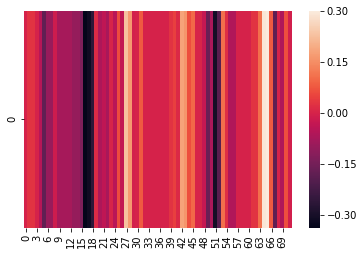

In [135]:
df = process_as_mean_diff(load_and_pivot_as_classes('condition', 2).head(get_relevant_rows('condition', 2)))
pca = get_pca(df.values)
sns.heatmap(pd.DataFrame(pca.components_[0]).transpose())

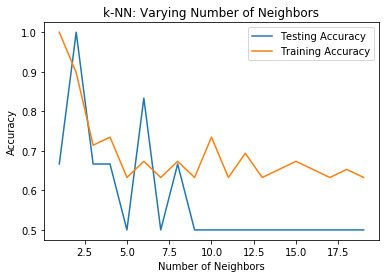

In [137]:
#KNN Analysis
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

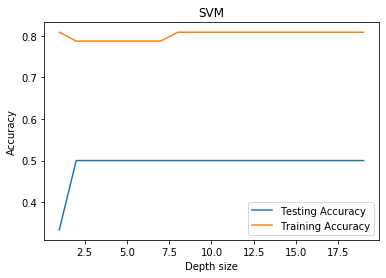

In [250]:
#SVM Analysis
svm_c = np.arange(1, 20)
train_accuracy = np.empty(len(svm_c))
test_accuracy = np.empty(len(svm_c))

# Loop over different values of k
for i, k in enumerate(svm_c):
    # Setup a k-NN Classifier with k neighbors: knn
    svm1 = SVC(kernel="linear", C=k)

    # Fit the classifier to the training data
    svm1.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = svm1.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = svm1.score(X_test, y_test)

# Generate plot
plt.title('SVM')
plt.plot(svm_c, test_accuracy, label = 'Testing Accuracy')
plt.plot(svm_c, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Depth size')
plt.ylabel('Accuracy')
plt.show()

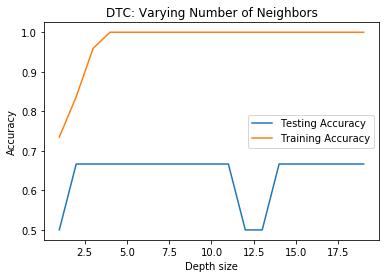

In [138]:
#DTC Analysis
dtc_depth = np.arange(1, 20)
train_accuracy = np.empty(len(dtc_depth))
test_accuracy = np.empty(len(dtc_depth))

# Loop over different values of k
for i, k in enumerate(dtc_depth):
    # Setup a k-NN Classifier with k neighbors: knn
    dtc = DecisionTreeClassifier(max_depth=k)

    # Fit the classifier to the training data
    dtc.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = dtc.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = dtc.score(X_test, y_test)

# Generate plot
plt.title('DTC: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Depth size')
plt.ylabel('Accuracy')
plt.show()

In [311]:
fig,axn = plt.subplots(11, 3, sharex=True, sharey=True)
fig.set_size_inches(120,440)


#plot_array_in_axis(control_dfs, axn)


In [312]:
fig,axn = plt.subplots(8, 3, sharex=True, sharey=True)
fig.set_size_inches(120,320)
arr_idx = 0

#plot_array_in_axis(condition_dfs, axn)

In [144]:
control_dfs[1]

KeyError: 1

In [9]:
# control_dfs[0].values
control_dfs[0]

time,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
date,,,,,,,,,,,,,,,,,,,,,
2003-03-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9389.0,15873.0,66308.0,20318.0,34070.0,25369.0,12036.0,14602.0,11911.0
2003-03-19,787.0,417.0,362.0,2021.0,622.0,290.0,1016.0,1597.0,4408.0,18645.0,...,9807.0,26062.0,7983.0,19517.0,36661.0,15938.0,11200.0,19040.0,11975.0,5654.0
2003-03-20,2802.0,350.0,533.0,219.0,401.0,876.0,3535.0,43992.0,17417.0,17914.0,...,8465.0,9926.0,30126.0,6709.0,30339.0,17160.0,6961.0,15877.0,28717.0,15920.0
2003-03-21,995.0,694.0,720.0,540.0,1411.0,439.0,1853.0,1012.0,14475.0,22548.0,...,18947.0,28337.0,20308.0,499.0,6604.0,8333.0,6311.0,10479.0,6708.0,15533.0
2003-03-22,8784.0,705.0,511.0,481.0,2719.0,1474.0,989.0,736.0,5882.0,24654.0,...,15772.0,17130.0,5932.0,18338.0,21335.0,11040.0,11040.0,11040.0,11040.0,10856.0
2003-03-23,20820.0,20820.0,20820.0,20820.0,20820.0,20820.0,20820.0,20820.0,20820.0,20820.0,...,28872.0,26487.0,12313.0,19446.0,12086.0,19747.0,26642.0,15170.0,21299.0,15111.0
2003-03-24,3184.0,368.0,207.0,484.0,1025.0,377.0,405.0,1263.0,532.0,622.0,...,23620.0,8374.0,42120.0,33875.0,18057.0,8293.0,23563.0,17536.0,14911.0,3376.0
2003-03-25,19102.0,2531.0,893.0,251.0,1004.0,303.0,1331.0,943.0,5665.0,29684.0,...,36067.0,54186.0,54521.0,36186.0,25487.0,48209.0,14647.0,20448.0,7361.0,22024.0
2003-03-26,2308.0,484.0,338.0,767.0,2364.0,905.0,572.0,606.0,1538.0,344.0,...,23224.0,30591.0,9130.0,24299.0,10791.0,6414.0,25420.0,29683.0,18546.0,29718.0


In [29]:
pca = get_pca(control_dfs[0].values)


In [141]:
pca.components_

array([[ 9.00514641e-02,  1.14668950e-01,  1.43729007e-16,
        -1.00111052e-16, -3.97215121e-17,  1.26220820e-17,
        -1.33955131e-17,  4.42672492e-18, -1.39874250e-01,
        -2.33343633e-01, -1.65053382e-01, -3.09402083e-01,
        -2.98298180e-01, -2.95367298e-01, -3.21237649e-18,
        -0.00000000e+00,  4.49207421e-03, -2.20532286e-01,
        -9.18771097e-02,  1.58512112e-03,  1.84783007e-02,
         2.07501227e-02, -9.39188274e-02,  8.85657833e-02,
         3.75200328e-02,  2.72986464e-02, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00,  1.14668950e-01,
         5.19031080e-04, -0.00000000e+00, -3.30879232e-02,
        -6.15073527e-02, -2.52421969e-02,  9.79551754e-02,
        -0.00000000e+00,  2.95367298e-01, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
         9.18771097e-02,  1.68931796e-02, -1.84783007e-02,
        -2.07501227e-02,  9.39188274e-02, -1.15864430e-01,
        -1.30502378e-01, -1.44898478e-01, -2.93088157e-0

In [160]:
pca.explained_variance_ratio_

array([0.19193262, 0.17350995, 0.11655593])

In [142]:
first_eigenbehavior = pd.DataFrame(pca.components_[0]).transpose()
second_eigenbehavior = pd.DataFrame(pca.components_[1]).transpose()

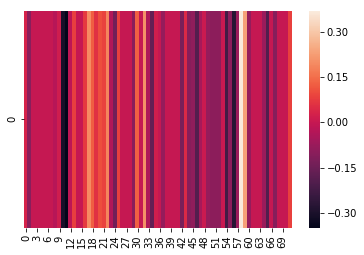

In [143]:
sns.heatmap(second_eigenbehavior)

In [26]:
first_eigenbehavior.transpose()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.114621,0.072911,0.025252,0.087755,0.032176,0.025667,0.031288,0.055853,0.060841,0.154051,...,0.226192,0.278878,0.365915,0.380668,0.244732,0.274646,0.243533,0.183565,0.172187,0.18448


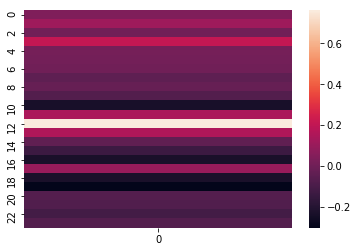

In [22]:
sns.heatmap(second_eigenbehavior)

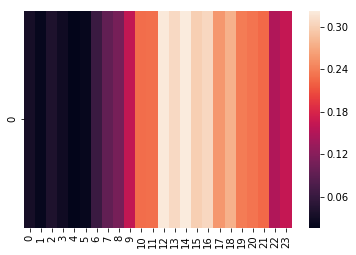

In [42]:
pca_ctrl_2 = PCA(n_components=3)
principalComponents = pca_ctrl_2.fit_transform(control_dfs[25].values)
ctrl_2_first_eigenbehavior = pd.DataFrame(pca_ctrl_2.components_[0])
ctrl_2_second_eigenbehavior = pd.DataFrame(pca_ctrl_2.components_[1])
ctrl_2_third_eigenbehavior = pd.DataFrame(pca_ctrl_2.components_[2])
sns.heatmap(ctrl_2_first_eigenbehavior.transpose())

array([0.35750578, 0.17922257, 0.12356947])

NameError: name 'ctrl_2_second_eigenbehavior' is not defined